In [13]:
import pandas as pd
import matplotlib.pylab as plt
import spacy
from tqdm import tqdm_notebook, tqdm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.manifold import TSNE
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

from corpus_analyzer import exttract_td_idf_features, plot_t_SNE, plot_FKG

tqdm.pandas()

In [14]:
import sys
sys.path.append('../../data')
from corpus import load_corpus
data = load_corpus('weebit')

feature_names = data['feature_names']
FEATURES_NAMES = data['FEATURES_NAMES']

X_train = data['X_train']
y_train = data['y_train']
y_train_onehot = data['y_train_onehot']
X_test = data['X_test']
y_test = data['y_test']
y_test_onehot = data['y_test_onehot']

In [15]:
len(FEATURES_NAMES['READABILITY_SCORES'])

7

In [16]:
text_df = pd.read_hdf('weebit/weebit.h5', 'text_df')
train_df = pd.read_hdf('weebit/weebit.h5', 'train_df')
test_df =  pd.read_hdf('weebit/weebit.h5', 'test_df')

In [17]:
nlp = spacy.load('en', disable=['tagger', 'dependency', 'ner'])
text_df['doc'] = text_df['text'].progress_apply(nlp)
train_df['doc'] = text_df.loc[train_df.index, 'doc']
test_df['doc'] = text_df.loc[test_df.index, 'doc']

100%|██████████| 3636/3636 [03:50<00:00, 24.00it/s]


In [22]:
text_df['ns'] = text_df['doc'].apply(lambda x: len(list(x.sents)))
train_df['ns'] = train_df['doc'].apply(lambda x: len(list(x.sents)))
test_df['ns'] = test_df['doc'].apply(lambda x: len(list(x.sents)))

In [23]:
text_df['ns'].sum()

65746

In [24]:
train_df['ns'].sum()

53229

In [25]:
test_df['ns'].sum()

12517

In [26]:
text_df['ns'].mean()

18.08195819581958

In [86]:
text_df.groupby('y')['ns'].mean()

y
0    16.130148
1    17.634518
2    21.939850
3    15.982893
4    17.841250
Name: ns, dtype: float64

In [3]:
tf_vectors, tf_feature_names = exttract_td_idf_features(train_df)

In [4]:
clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=0)

In [8]:
cross_val_score(clf, tf_vectors, train_df['y'], cv=10).mean()

0.7035507045161358

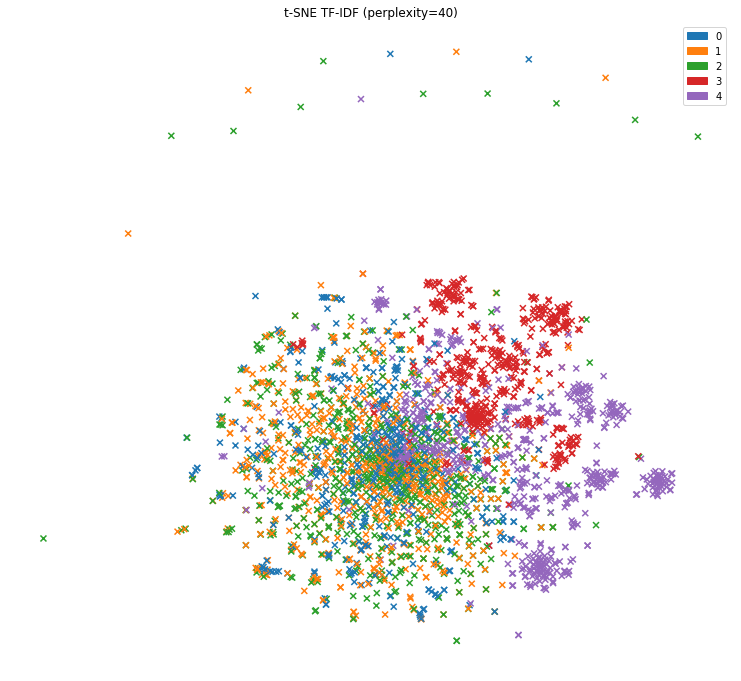

In [19]:
plot_t_SNE(train_df, tf_vectors, normalized=True, reduced_dim=None, title='TF-IDF (perplexity=40)')
plt.savefig('tsne-normalized-not-embedded.png', dpi=300)

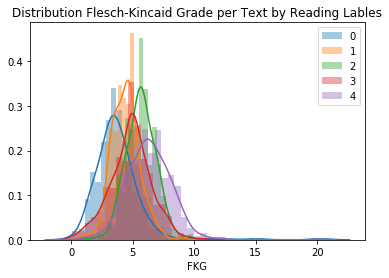

In [18]:
plot_FKG(train_df)
plt.savefig('fkg.png', dpi=300)